# 0.0 Imports

In [99]:
from sklearn    import datasets as ds
from matplotlib import pyplot   as plt
from sklearn    import cluster  as ct
from sklearn    import metrics  as mt
import numpy    as np

# 1.0 Loading Datasets

In [114]:
x,y = ds.make_blobs (
    n_samples=100,
    n_features=8,
    centers=4,
    cluster_std=0.5,
    random_state=0
    
)

In [109]:
y

array([2, 2, 0, 2, 1, 3, 1, 0, 3, 0, 2, 2, 3, 0, 1, 1, 2, 2, 2, 0, 3, 1,
       1, 0, 2, 0, 0, 3, 2, 3, 0, 3, 2, 0, 2, 0, 2, 2, 3, 3, 3, 3, 0, 0,
       1, 1, 2, 0, 1, 3, 0, 2, 2, 3, 2, 1, 1, 3, 1, 0, 1, 1, 1, 3, 0, 3,
       3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 0, 1, 2, 2, 2, 0, 3, 0, 2, 3, 1, 0,
       3, 1, 1, 3, 1, 0, 3, 0, 0, 3, 1, 0])

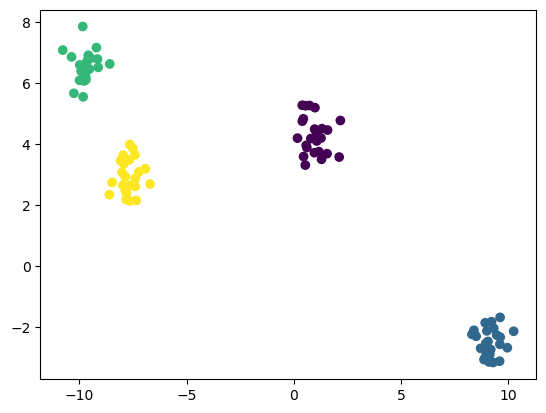

In [115]:
plt.scatter( x[:,0], x[:,1],c=y )

# 2.0 Training Model

In [116]:
# define
n_clusters = 4

kmeans = ct.KMeans(
    n_clusters=n_clusters,
    init='random',
    n_init=10,
    random_state=0
  )

# fit (training)
labels = kmeans.fit_predict (x)
# performance (test)
ss_avg = mt.silhouette_score(x, labels)

print('For n_cluester = {} - The Avg SS = {}'.format(n_clusters, ss_avg))

For n_cluester = 4 - The Avg SS = 0.8925613741827135


C:\Users\rseme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 3.0 Fine Tunning

In [117]:
np.arange(2,11,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [118]:
# define
n_clusters = np.arange(2,11,1)
list = []

for c in n_clusters:
        kmeans = ct.KMeans(
                n_clusters=c,
                init='random',
                n_init=10,
                random_state=0)
    
        # fit (training)
        labels = kmeans.fit_predict (x)
        # performance (test)
        ss_avg = mt.silhouette_score(x, labels)
        
        list.append(ss_avg)
        print('For n_cluster = {} - The Avg SS = {}'.format(c, ss_avg))


For n_cluster = 2 - The Avg SS = 0.6263177149101115
For n_cluster = 3 - The Avg SS = 0.6953408250960195
For n_cluster = 4 - The Avg SS = 0.8925613741827135
For n_cluster = 5 - The Avg SS = 0.7161949969841942
For n_cluster = 6 - The Avg SS = 0.5148082450343844
For n_cluster = 7 - The Avg SS = 0.3463415627938623
For n_cluster = 8 - The Avg SS = 0.1546953444277435
For n_cluster = 9 - The Avg SS = 0.16314096895895652
For n_cluster = 10 - The Avg SS = 0.1544517726028004


C:\Users\rseme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rseme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rseme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rseme\AppData\Ro

Text(0, 0.5, 'Silhouette Score Average')

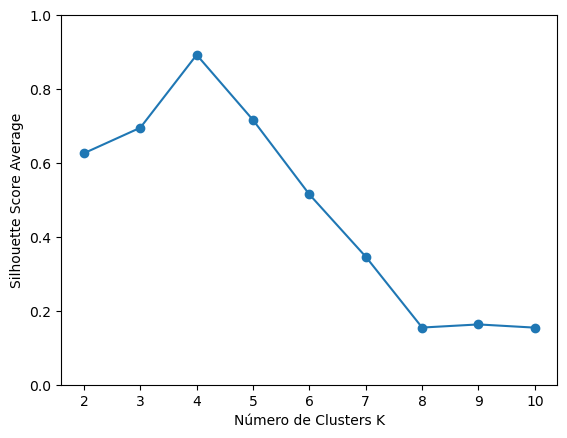

In [119]:
plt.plot(n_clusters, list, marker='o')
plt.ylim(0,1)
plt.xlabel('Número de Clusters K')
plt.ylabel('Silhouette Score Average')

# 4.0 Modelo em Produção

C:\Users\rseme\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


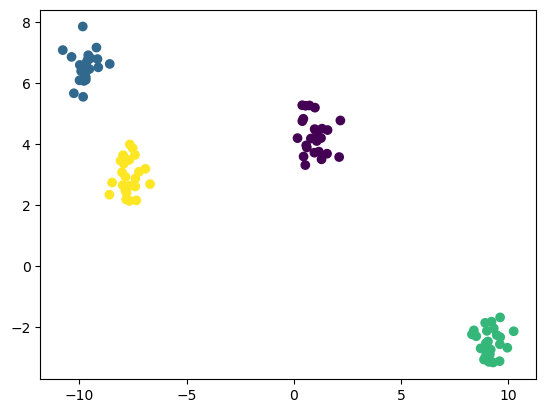

In [124]:
 #define
c = 4
kmeans = ct.KMeans(
        n_clusters=c,
        init='random',
        n_init=10,
        random_state=0)
    
# fit (training)
labels = kmeans.fit_predict (x)
# performance (test)
ss_avg = mt.silhouette_score(x, labels)

plt.scatter( x[:,0], x[:,1],c=labels)